# 1. import libraries

In [1]:
# data manipulation and plotting tools
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# data processing
from category_encoders.one_hot import OneHotEncoder
from category_encoders.ordinal import OrdinalEncoder
from category_encoders.target_encoder import TargetEncoder
from sklearn.preprocessing import MinMaxScaler, RobustScaler,LabelEncoder

# algorithms
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# model selection tools
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

# metrics
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix

# explainability
import shap

#visual
import seaborn as sns

#MostrarMas
pd.set_option('display.max_columns', None)

C:\Users\sharo\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#pip install --upgrade category_encoders

In [35]:
pip install --upgrade category_encoders

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


# 2. Load the dataset

In [2]:
data = pd.read_csv('churn.csv')

In [3]:
data.head()

,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,City,Zip Code,Latitude,Longitude,Population,Quarter,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,Male,78,No,Yes,No,No,0,United States,California,Los Angeles,90022,34.023810,-118.156582,68701,Q3,No,0,1,NaN,No,0.00,No,Yes,DSL,8,No,No,Yes,No,No,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65,3,Churned,Yes,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,Female,74,No,Yes,Yes,Yes,1,United States,California,Los Angeles,90063,34.044271,-118.185237,55668,Q3,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Fiber Optic,17,No,Yes,No,No,No,No,No,Yes,Month-to-Month,Yes,Credit Card,80.65,633.30,0.00,0,390.80,1024.10,3,Churned,Yes,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,Male,71,No,Yes,No,Yes,3,United States,California,Los Angeles,90065,34.108833,-118.229715,47534,Q3,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,52,No,No,No,No,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88,2,Churned,Yes,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,Female,78,No,Yes,Yes,Yes,1,United States,California,Inglewood,90303,33.936291,-118.332639,27778,Q3,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,12,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,13.43,0,494.00,2995.07,2,Churned,Yes,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,Female,80,No,Yes,Yes,Yes,1,United States,California,Whittier,90602,33.972119,-118.020188,26265,Q3,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Fiber Optic,14,No,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,0.00,0,234.21,3102.36,2,Churned,Yes,67,2793,Price,Extra data charges


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 50 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Under 30                           7043 non-null   object 
 4   Senior Citizen                     7043 non-null   object 
 5   Married                            7043 non-null   object 
 6   Dependents                         7043 non-null   object 
 7   Number of Dependents               7043 non-null   int64  
 8   Country                            7043 non-null   object 
 9   State                              7043 non-null   object 
 10  City                               7043 non-null   object 
 11  Zip Code                           7043 non-null   int64

# 3. Data Splitting

In [6]:
#X = data.drop("Churn Label", axis=1) 
#y = data["Churn Label"]

##Decidimos que es mejor despues

In [7]:
#X_trainin, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Exploratory Data Analysis

In [5]:
# Your code here. Exploratory data analysis can be done before splitting, but do not transform the dataset before splitting.
data.info() #No valores nulos 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 50 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Under 30                           7043 non-null   object 
 4   Senior Citizen                     7043 non-null   object 
 5   Married                            7043 non-null   object 
 6   Dependents                         7043 non-null   object 
 7   Number of Dependents               7043 non-null   int64  
 8   Country                            7043 non-null   object 
 9   State                              7043 non-null   object 
 10  City                               7043 non-null   object 
 11  Zip Code                           7043 non-null   int64

In [6]:
missing_percentage_Offer = (data['Offer'].isnull().sum() / len(data)) * 100
print(f"Porcentaje de valores faltantes en la columna 'Offer': {missing_percentage_Offer:.2f}%")

Porcentaje de valores faltantes en la columna 'Offer': 55.05%


In [7]:
missing_percentage_Internet_Type = (data['Internet Type'].isnull().sum() / len(data)) * 100
print(f"Porcentaje de valores faltantes en la columna 'Internet Type': {missing_percentage_Internet_Type:.2f}%")

Porcentaje de valores faltantes en la columna 'Internet Type': 21.67%


In [8]:
#Estructura de los datos y resumen:  El dataset original tiene 50 columnas,
#con variables de datos demográficos, geográficas, con información sobre los servicios,
#datos financieros, y satisfacción y comportamiento del cliente.
#Análisis de datos faltantes: Las siguientes columnas tienen valores faltantes:  Offer (55,05%)  e Internet Type (21,67%) 
#Esta información está relacionada con los clientes que se han dado de baja, y se van a ir evaluando a medida que 
#se realice el estudio del dataset

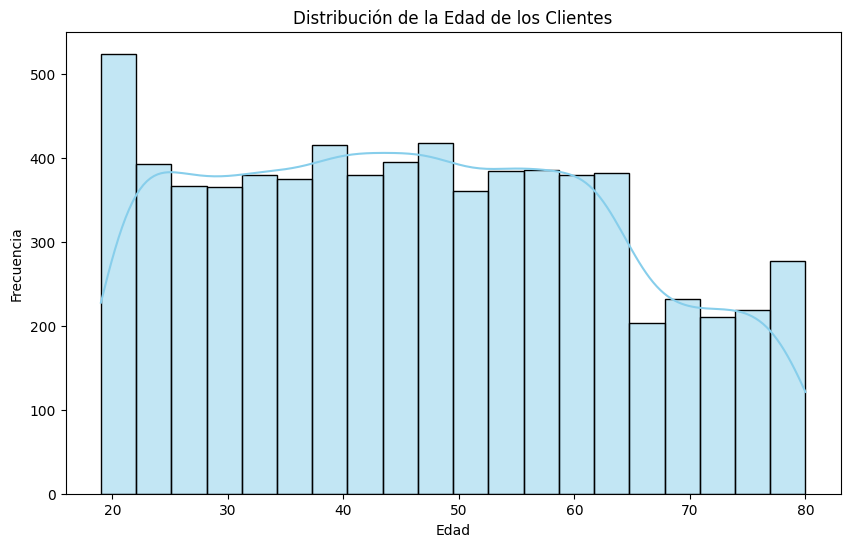

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=20, kde=True, color='skyblue')
plt.title('Distribución de la Edad de los Clientes')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

In [10]:
mean_age = data['Age'].mean()
print(f"La media de la edad es: {mean_age}")

La media de la edad es: 46.50972596904728


In [11]:
data['Age'].describe()

count    7043.000000
mean       46.509726
std        16.750352
min        19.000000
25%        32.000000
50%        46.000000
75%        60.000000
max        80.000000
Name: Age, dtype: float64

In [15]:
data["Age_cuartiles"] = pd.qcut(data['Age'], q=4)
print(Age_cuartiles)

0         (60.0, 80.0]
1         (60.0, 80.0]
2         (60.0, 80.0]
3         (60.0, 80.0]
4         (60.0, 80.0]
             ...      
7038    (18.999, 32.0]
7039      (32.0, 46.0]
7040    (18.999, 32.0]
7041    (18.999, 32.0]
7042      (32.0, 46.0]
Name: Age, Length: 7043, dtype: category
Categories (4, interval[float64, right]): [(18.999, 32.0] < (32.0, 46.0] < (46.0, 60.0] < (60.0, 80.0]]


In [16]:
# Agrupar por los cuartiles de edad y contar los valores normalizados (proporciones) de "Churn Label"
proporciones = data.groupby("Age_cuartiles")["Churn Label"].value_counts(normalize=True)

# Mostrar el resultado
print(proporciones)

Age_cuartiles   Churn Label
(18.999, 32.0]  No             0.775141
                Yes            0.224859
(32.0, 46.0]    No             0.763317
                Yes            0.236683
(46.0, 60.0]    No             0.757542
                Yes            0.242458
(60.0, 80.0]    No             0.635379
                Yes            0.364621
Name: proportion, dtype: float64


C:\Users\sharo\AppData\Local\Temp\ipykernel_8768\1642023880.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  proporciones = data.groupby("Age_cuartiles")["Churn Label"].value_counts(normalize=True)


In [ ]:
#Si agrupamos en cuartiles por edad, los que más hacen churn son los de 60 a 80 años.

In [64]:
#Los rangos de edad están desde los 19 a 80 años, siendo la media alrededor de los 46.50 años

In [18]:
data['Tenure in Months'].describe()

count    7043.000000
mean       32.386767
std        24.542061
min         1.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: Tenure in Months, dtype: float64

In [20]:
data["Multiple Lines"].value_counts(normalize=True)

Multiple Lines
No     0.578163
Yes    0.421837
Name: proportion, dtype: float64

In [21]:
#con select dtypes, excluyendo los números, escojo solo las categóricas
categorical_columns = data.select_dtypes(exclude=["number"]).columns

In [22]:
categorical_columns

Index(['Customer ID', 'Gender', 'Under 30', 'Senior Citizen', 'Married',
       'Dependents', 'Country', 'State', 'City', 'Quarter',
       'Referred a Friend', 'Offer', 'Phone Service', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Online Security', 'Online Backup',
       'Device Protection Plan', 'Premium Tech Support', 'Streaming TV',
       'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract',
       'Paperless Billing', 'Payment Method', 'Customer Status', 'Churn Label',
       'Churn Category', 'Churn Reason', 'Age_cuartiles'],
      dtype='object')

In [28]:
data.groupby("Internet Service")["Churn Label"].value_counts()

Internet Service  Churn Label
No                No             1413
                  Yes             113
Yes               No             3761
                  Yes            1756
Name: count, dtype: int64

In [30]:
data.groupby("Internet Service")["Churn Label"].value_counts(normalize=True)

Internet Service  Churn Label
No                No             0.925950
                  Yes            0.074050
Yes               No             0.681711
                  Yes            0.318289
Name: proportion, dtype: float64

In [ ]:
#De los que NO tienen internet, hay una mayor proporción de NO hacer churn.  

In [31]:
from scipy.stats import chi2_contingency

# Crear tabla de contingencia entre 'Internet Service' y 'Churn Label'
tabla_contingencia = pd.crosstab(data['Internet Service'], data['Churn Label'])

# Aplicar la prueba Chi-cuadrado
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)

print(f"Chi-cuadrado: {chi2}")
print(f"Valor p: {p}")

Chi-cuadrado: 364.51979899428943
Valor p: 2.9203003727695145e-81


In [32]:
import numpy as np

# Calcular el índice de Cramér
n = data.shape[0]  # número de observaciones
cramer_v = np.sqrt(chi2 / (n * (min(tabla_contingencia.shape) - 1)))

print(f"Índice de Cramér: {cramer_v}")


Índice de Cramér: 0.2275001654652337


In [ ]:
#Hay una correlación débil entre tener servicio de internet y hacer churn

In [24]:
data.groupby("Multiple Lines")["Churn Label"].value_counts()

Multiple Lines  Churn Label
No              No             3053
                Yes            1019
Yes             No             2121
                Yes             850
Name: count, dtype: int64

In [25]:
data.groupby("Multiple Lines")["Churn Label"].value_counts(normalize=True)

Multiple Lines  Churn Label
No              No             0.749754
                Yes            0.250246
Yes             No             0.713901
                Yes            0.286099
Name: proportion, dtype: float64

In [ ]:
#hay más clientes que hacen churn cuando tienen múltiples líneas, sin embargo la diferencia no es muy drástica

In [33]:
# Crear tabla de contingencia
tabla_contingencia_multiple_lines = pd.crosstab(data['Multiple Lines'], data['Churn Label'])

# Aplicar la prueba Chi-cuadrado
chi2_multiple_lines, p_multiple_lines, dof_multiple_lines, expected_multiple_lines = chi2_contingency(tabla_contingencia_multiple_lines)

# Calcular el índice de Cramér
n_multiple_lines = data.shape[0]  # número de observaciones
cramer_v_multiple_lines = np.sqrt(chi2_multiple_lines / (n_multiple_lines * (min(tabla_contingencia_multiple_lines.shape) - 1)))

# Mostrar resultados
print(f"Chi-cuadrado: {chi2_multiple_lines}")
print(f"Valor p: {p_multiple_lines}")
print(f"Índice de Cramér: {cramer_v_multiple_lines}")


Chi-cuadrado: 11.143251001456251
Valor p: 0.0008433795342472428
Índice de Cramér: 0.03977655002347514


In [34]:
data["Satisfaction Score"].value_counts()

Satisfaction Score
3    2665
4    1789
5    1149
1     922
2     518
Name: count, dtype: int64

In [36]:
data.groupby("Satisfaction Score")["Churn Label"].value_counts()

Satisfaction Score  Churn Label
1                   Yes             922
2                   Yes             518
3                   No             2236
                    Yes             429
4                   No             1789
5                   No             1149
Name: count, dtype: int64

In [37]:
data.groupby("Satisfaction Score")["Churn Label"].value_counts(normalize=True)

Satisfaction Score  Churn Label
1                   Yes            1.000000
2                   Yes            1.000000
3                   No             0.839024
                    Yes            0.160976
4                   No             1.000000
5                   No             1.000000
Name: proportion, dtype: float64

In [ ]:
#Clientes que tienen menos de 3 en score, van a hacer churn. Los que tienen más de 3 no harán churn. 
#Si tienen = 3, hay menor probabilidad de que hagan churn.

##FEATURE ENGINEERING

In [38]:
# Crear una nueva columna categórica para los niveles de satisfacción
data['Satisfaction_Level'] = pd.cut(data['Satisfaction Score'], 
                                    bins=[0, 2, 3, 5],  # Límites de los grupos
                                    labels=['Baja', 'Media', 'Alta'])  # Nombres de los grupos

# Ver el resultado agrupado
print(data.groupby('Satisfaction_Level')["Churn Label"].value_counts(normalize=True))

Satisfaction_Level  Churn Label
Baja                Yes            1.000000
                    No             0.000000
Media               No             0.839024
                    Yes            0.160976
Alta                No             1.000000
                    Yes            0.000000
Name: proportion, dtype: float64


C:\Users\sharo\AppData\Local\Temp\ipykernel_8768\645799376.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(data.groupby('Satisfaction_Level')["Churn Label"].value_counts(normalize=True))


In [ ]:
#Los valores del 1 al 2 serán categorizados como "Bajo", el 3 como "Medio" y del 4 al 5 como "Alto".

In [40]:
# Crear una tabla de contingencia entre los niveles de satisfacción y el churn
tabla_contingencia_satisfaction = pd.crosstab(data['Satisfaction_Level'], data['Churn Label'])

# Aplicar la prueba Chi-cuadrado
chi2_satisfaction, p_satisfaction, dof_satisfaction, expected_satisfaction = chi2_contingency(tabla_contingencia_satisfaction)

# Calcular el índice de Cramér
n_satisfaction = data.shape[0]  # número de observaciones
cramer_v_satisfaction = np.sqrt(chi2_satisfaction / (n_satisfaction * (min(tabla_contingencia_satisfaction.shape) - 1)))

# Mostrar resultados
print(f"Chi-cuadrado: {chi2_satisfaction}")
print(f"Valor p: {p_satisfaction}")
print(f"Índice de Cramér: {cramer_v_satisfaction}")


Chi-cuadrado: 5196.660635558484
Valor p: 0.0
Índice de Cramér: 0.8589805576402029


In [41]:
data.groupby("Referred a Friend")["Churn Label"].value_counts(normalize=True)

Referred a Friend  Churn Label
No                 No             0.674169
                   Yes            0.325831
Yes                No             0.806331
                   Yes            0.193669
Name: proportion, dtype: float64

In [45]:
data.groupby(["Satisfaction_Level","Referred a Friend"])["Churn Label"].value_counts(normalize=True)

C:\Users\sharo\AppData\Local\Temp\ipykernel_8768\3408265129.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby(["Satisfaction_Level","Referred a Friend"])["Churn Label"].value_counts(normalize=True)


Satisfaction_Level  Referred a Friend  Churn Label
Baja                No                 Yes            1.000000
                                       No             0.000000
                    Yes                Yes            1.000000
                                       No             0.000000
Media               No                 No             0.778761
                                       Yes            0.221239
                    Yes                No             0.901451
                                       Yes            0.098549
Alta                No                 No             1.000000
                                       Yes            0.000000
                    Yes                No             1.000000
                                       Yes            0.000000
Name: proportion, dtype: float64

In [ ]:
#Bajo nivel de satisfacción, siempre habrá churn sin importar referencias.
#Medio nivel de satisfacción, hay mayor proporción de churn si no ha hecho referencias.
#Alto nivel nunca tiene churn

In [46]:
# Crear una tabla de contingencia entre "Referred a Friend" y "Churn Label"
tabla_contingencia_referred = pd.crosstab(data['Referred a Friend'], data['Churn Label'])

# Aplicar la prueba Chi-cuadrado
chi2_referred, p_referred, dof_referred, expected_referred = chi2_contingency(tabla_contingencia_referred)

# Calcular el índice de Cramér
n_referred = data.shape[0]  # número de observaciones
cramer_v_referred = np.sqrt(chi2_referred / (n_referred * (min(tabla_contingencia_referred.shape) - 1)))

# Mostrar resultados
print(f"Chi-cuadrado: {chi2_referred}")
print(f"Valor p: {p_referred}")
print(f"Índice de Cramér: {cramer_v_referred}")


Chi-cuadrado: 155.9403419629973
Valor p: 8.723767916604251e-36
Índice de Cramér: 0.1487991316960442


In [35]:
data["Churn Label"].value_counts(normalize="True")

Churn Label
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

In [73]:
data["Payment Method"].value_counts(normalize=True) ##Mas de la mitad son por Bank

Payment Method
Bank Withdrawal    0.555019
Credit Card        0.390317
Mailed Check       0.054664
Name: proportion, dtype: float64

In [75]:
data.groupby("Payment Method")["Churn Label"].value_counts(normalize=True)

Payment Method   Churn Label
Bank Withdrawal  No             0.660015
                 Yes            0.339985
Credit Card      No             0.855220
                 Yes            0.144780
Mailed Check     No             0.631169
                 Yes            0.368831
Name: proportion, dtype: float64

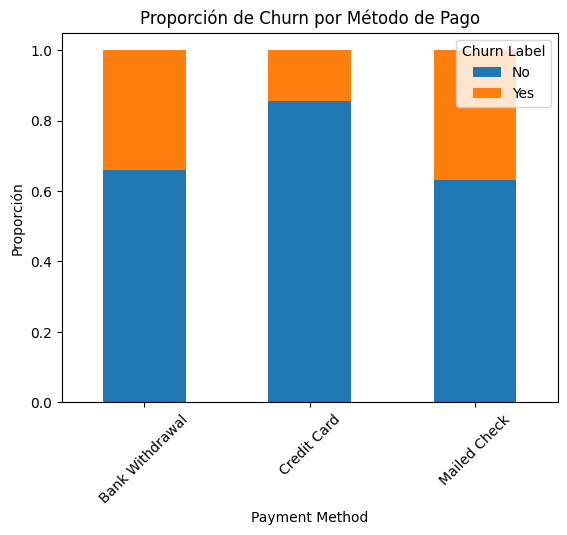

In [76]:
import pandas as pd
import matplotlib.pyplot as plt

# Crear el DataFrame a partir de tus datos
data = {'Payment Method': ['Bank Withdrawal', 'Bank Withdrawal', 'Credit Card', 'Credit Card', 'Mailed Check', 'Mailed Check'],
        'Churn Label': ['No', 'Yes', 'No', 'Yes', 'No', 'Yes'],
        'Proportion': [0.660015, 0.339985, 0.855220, 0.144780, 0.631169, 0.368831]}

df = pd.DataFrame(data)

# Pivotar la tabla para que Churn Label sea la columna
pivot_df = df.pivot(index='Payment Method', columns='Churn Label', values='Proportion')

# Graficar barras apiladas
pivot_df.plot(kind='bar', stacked=True)

plt.title('Proporción de Churn por Método de Pago')
plt.ylabel('Proporción')
plt.xticks(rotation=45)
plt.show()


In [ ]:
#Los que menos hacen churn son los que pagan con tarjeta de crédito. 

In [74]:
data["City"].value_counts()

City
Los Angeles         293
San Diego           285
San Jose            112
Sacramento          108
San Francisco       104
                   ... 
Eldridge              2
South Lake Tahoe      2
Johannesburg          2
Jacumba               2
Holtville             2
Name: count, Length: 1106, dtype: int64

In [95]:
data["City"].describe()

count            7043
unique           1106
top       Los Angeles
freq              293
Name: City, dtype: object

In [97]:
data.groupby("Age")["Churn Label"].value_counts()

Age  Churn Label
19   0              109
     1               18
20   0               97
     1               30
21   0              104
                   ... 
78   1               30
79   0               49
     1               27
80   0               37
     1               29
Name: count, Length: 124, dtype: int64

In [78]:
data.groupby("City")["Churn Label"].value_counts(normalize=True)

City          Churn Label
Acampo        Yes            0.75
              No             0.25
Acton         No             1.00
Adelanto      No             0.80
              Yes            0.20
                             ... 
Yucaipa       No             0.75
              Yes            0.25
Yucca Valley  No             1.00
Zenia         No             0.75
              Yes            0.25
Name: proportion, Length: 1875, dtype: float64

In [80]:
data.groupby("City")["Churn Label"].value_counts()

City          Churn Label
Acampo        Yes            3
              No             1
Acton         No             4
Adelanto      No             4
              Yes            1
                            ..
Yucaipa       No             3
              Yes            1
Yucca Valley  No             5
Zenia         No             3
              Yes            1
Name: count, Length: 1875, dtype: int64

In [79]:
data["City"].value_counts()

City
Los Angeles         293
San Diego           285
San Jose            112
Sacramento          108
San Francisco       104
                   ... 
Eldridge              2
South Lake Tahoe      2
Johannesburg          2
Jacumba               2
Holtville             2
Name: count, Length: 1106, dtype: int64

In [23]:
data["City"].describe()

count            7043
unique           1106
top       Los Angeles
freq              293
Name: City, dtype: object

<Axes: >

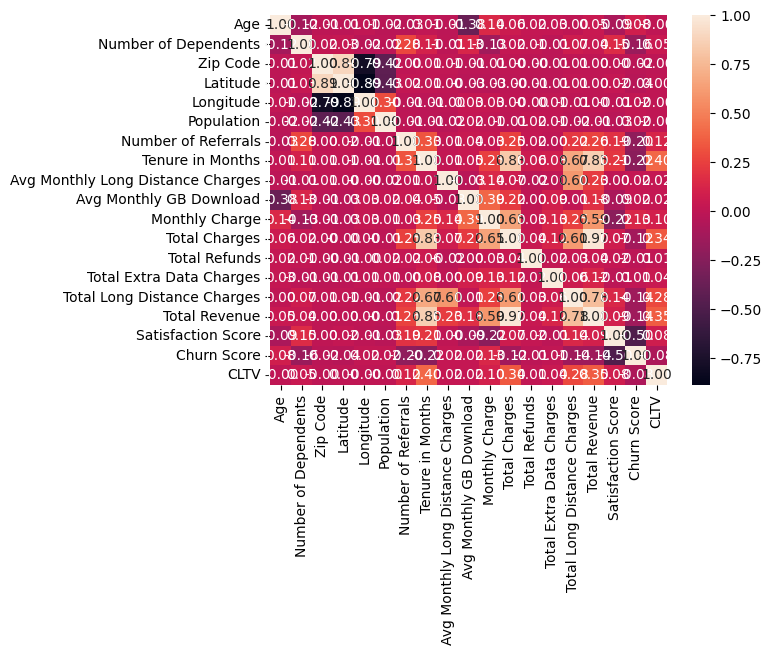

In [51]:
#corr calcula coeficiente de correlacion de pearson, y solo toma las numericas
sns.heatmap(data.corr(numeric_only=True), annot=True, fmt=".2f")

In [52]:
data[(data["Total Refunds"]!=0) & (data["Churn Label"]=="Yes")] ## Ver cuan relacionado esta que haya reembolsos con el churn

,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,City,Zip Code,Latitude,Longitude,Population,Quarter,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason,Age_cuartiles,Satisfaction_Level
2,1658-BYGOY,Male,71,No,Yes,No,Yes,3,United States,California,Los Angeles,90065,34.108833,-118.229715,47534,Q3,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,52,No,No,No,No,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88,2,Churned,Yes,81,3179,Competitor,Competitor made better offer,"(60.0, 80.0]",Baja
3,4598-XLKNJ,Female,78,No,Yes,Yes,Yes,1,United States,California,Inglewood,90303,33.936291,-118.332639,27778,Q3,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,12,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,13.43,0,494.00,2995.07,2,Churned,Yes,88,5337,Dissatisfaction,Limited range of services,"(60.0, 80.0]",Baja
7,3445-HXXGF,Male,66,No,Yes,Yes,No,0,United States,California,Sierra Madre,91024,34.168686,-118.057505,10558,Q3,Yes,6,58,Offer B,No,0.00,No,Yes,DSL,24,No,Yes,Yes,No,No,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,45.30,2651.20,40.95,0,0.00,2610.25,1,Churned,Yes,91,5444,Dissatisfaction,Service dissatisfaction,"(60.0, 80.0]",Baja
9,2070-FNEXE,Female,77,No,Yes,No,Yes,2,United States,California,Pasadena,91107,34.159007,-118.087353,32369,Q3,No,0,7,Offer E,Yes,26.95,No,Yes,Fiber Optic,18,Yes,No,No,No,No,No,No,No,Month-to-Month,No,Bank Withdrawal,76.45,503.60,11.05,0,188.65,681.20,2,Churned,Yes,81,4419,Price,Lack of affordable download/upload speed,"(60.0, 80.0]",Baja
111,7156-MHUGY,Male,68,No,Yes,No,No,0,United States,California,Buena Park,90621,33.874224,-117.993368,33528,Q3,No,0,13,NaN,Yes,26.11,No,Yes,Fiber Optic,4,No,No,No,No,Yes,Yes,Yes,No,Month-to-Month,Yes,Bank Withdrawal,90.50,1201.15,29.84,140,339.43,1650.74,1,Churned,Yes,76,5394,Competitor,Competitor had better devices,"(60.0, 80.0]",Baja
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2394,2869-ADAWR,Female,41,No,No,No,No,0,United States,California,Sutter Creek,95685,38.432145,-120.770690,4610,Q3,No,0,45,Offer B,Yes,14.12,Yes,Yes,Fiber Optic,24,No,Yes,No,No,Yes,No,No,Yes,Month-to-Month,Yes,Credit Card,89.30,4016.85,44.63,0,635.40,4607.62,2,Churned,Yes,90,4880,Dissatisfaction,Poor expertise of online support,"(32.0, 46.0]",Baja
2397,0637-UBJRP,Male,40,No,No,Yes,No,0,United States,California,Wilton,95693,38.392559,-121.225093,5889,Q3,Yes,5,13,Offer D,Yes,29.92,No,Yes,Fiber Optic,21,Yes,No,No,No,No,Yes,Yes,Yes,Month-to-Month,No,Bank Withdrawal,84.05,1095.30,23.97,0,388.96,1460.29,1,Churned,Yes,77,4745,Competitor,Competitor offered higher download speeds,"(32.0, 46.0]",Baja
2398,0940-OUQEC,Male,54,No,No,No,No,0,United States,California,Winters,95694,38.578604,-122.024579,8406,Q3,No,0,10,Offer D,Yes,17.07,Yes,Yes,Fiber Optic,3,No,Yes,No,No,No,No,No,No,Month-to-Month,Yes,Bank Withdrawal,80.70,788.80,38.42,50,170.70,971.08,1,Churned,Yes,77,3492,Competitor,Competitor offered more data,"(46.0, 60.0]",Baja
2399,0702-PGIBZ,Male,28,Yes,No,No,No,0,United States,California,Dutch Flat,95714,39.197215,-120.836790,350,Q3,No,0,4,Offer E,Yes,26.16,Yes,Yes,Fiber Optic,85,No,Yes,No,No,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,101.70,364.55,1.48,0,104.64,467.71,2,Churned,Yes,91,2777,Competitor,Competitor made better o

In [53]:
value_counts = data["Total Extra Data Charges"].value_counts()

# Convierte el resultado de value_counts a un DataFrame para facilitar la visualización
df = value_counts.reset_index()
df.columns = ['Total Extra Data Charges', 'Count']
df

,Total Extra Data Charges,Count
0,0,6315
1,10,138
2,40,62
3,30,58
4,20,51
5,80,47
6,100,44
7,50,43
8,150,42
9,130,40


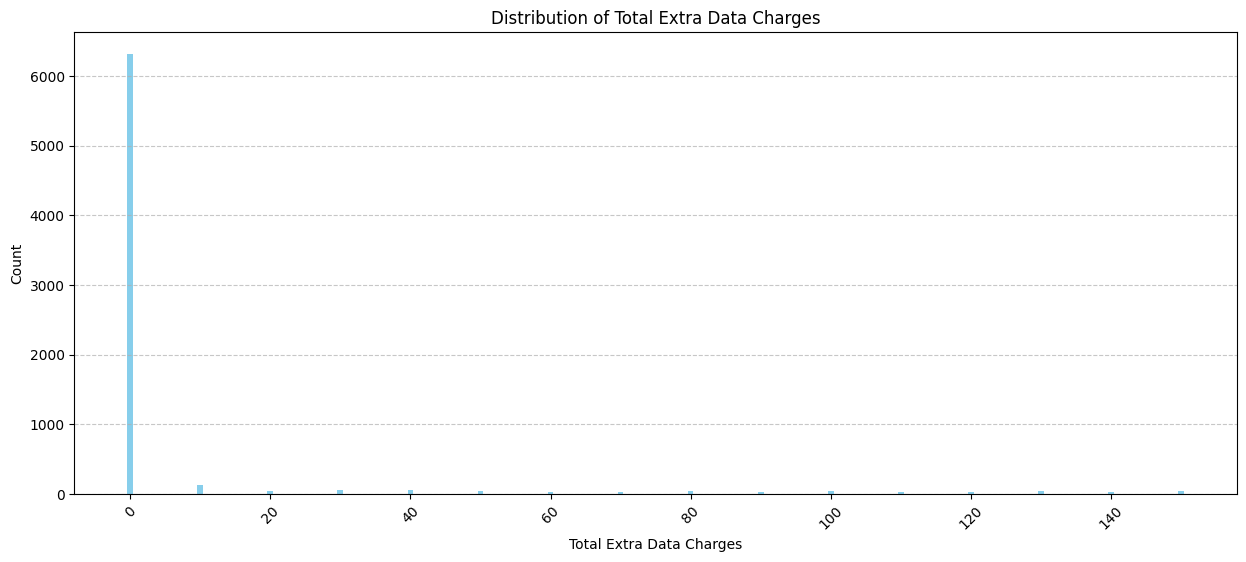

In [54]:
plt.figure(figsize=(15, 6))  # Ajusta el valor 15 para hacerla aún más ancha si lo necesitas
plt.bar(df['Total Extra Data Charges'], df['Count'], color='skyblue')
plt.xlabel('Total Extra Data Charges')
plt.ylabel('Count')
plt.title('Distribution of Total Extra Data Charges')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


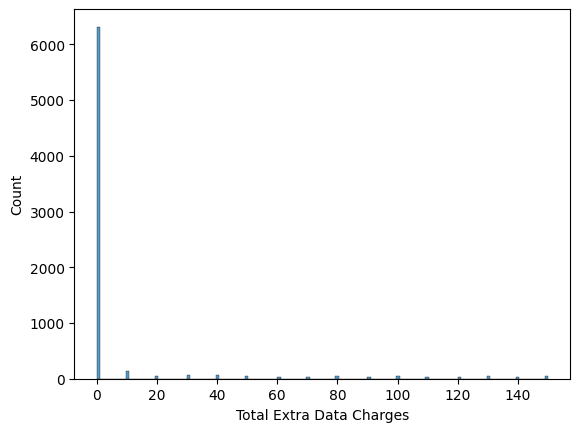

In [55]:
sns.histplot(data["Total Extra Data Charges"], bins=140)
plt.show()

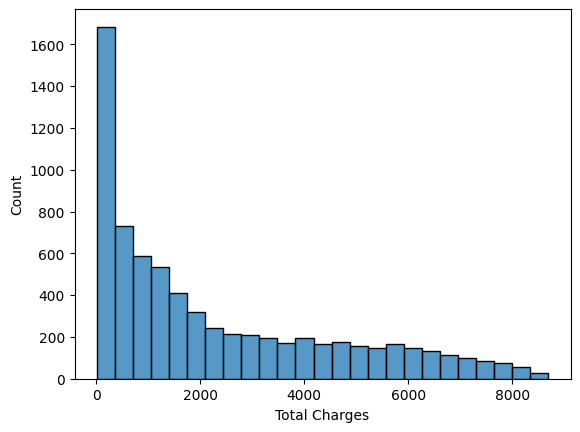

In [56]:
sns.histplot(data['Total Charges'])
plt.show()

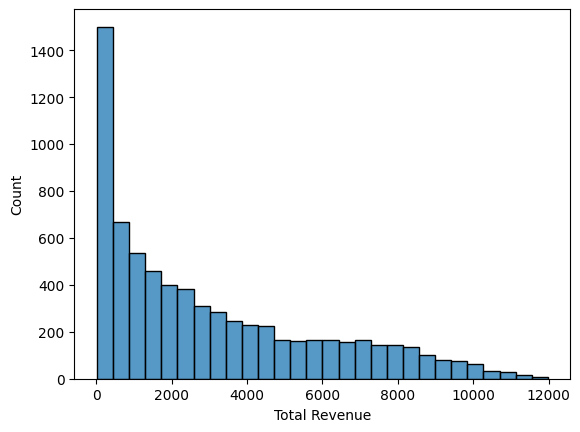

In [57]:
sns.histplot(data['Total Revenue'])
plt.show()

In [58]:
data["Referred a Friend"].value_counts()

Referred a Friend
No     3821
Yes    3222
Name: count, dtype: int64

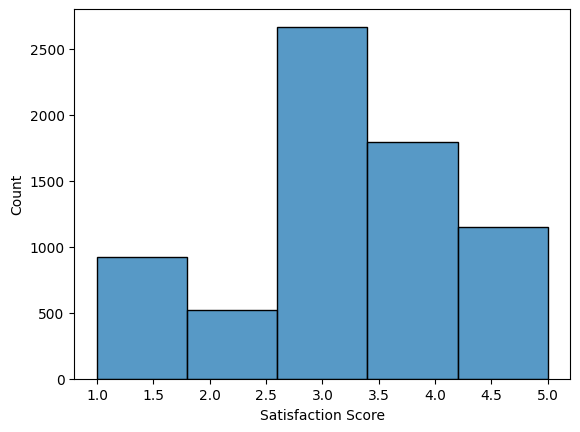

In [59]:
sns.histplot(data['Satisfaction Score'],bins = 5) ## por lo general es una satisfaccion alta
plt.show()

In [60]:
data["Premium Tech Support"].value_counts()

Premium Tech Support
No     4999
Yes    2044
Name: count, dtype: int64

In [62]:
data.groupby("Premium Tech Support")["Churn Label"].value_counts(normalize=True)

Premium Tech Support  Churn Label
No                    No             0.688138
                      Yes            0.311862
Yes                   No             0.848337
                      Yes            0.151663
Name: proportion, dtype: float64

In [ ]:
#Los clientes que tienen Premium Tech Support muestran una menor tasa de churn (15.17%) en comparación con aquellos que no lo tienen (31.19%).
#Premium Tech Support tiene mucho que ver con la retención de los clientes. 

In [61]:
contingency_table = pd.crosstab(data['Premium Tech Support'], data['Churn Label'])
print(contingency_table)

Churn Label             No   Yes
Premium Tech Support            
No                    3440  1559
Yes                   1734   310


In [65]:
data.groupby("Gender")["Churn Label"].value_counts(normalize=True)

Gender  Churn Label
Female  No             0.730791
        Yes            0.269209
Male    No             0.738397
        Yes            0.261603
Name: proportion, dtype: float64

In [67]:
data.groupby("Contract")["Churn Label"].value_counts(normalize=True)

Contract        Churn Label
Month-to-Month  No             0.541551
                Yes            0.458449
One Year        No             0.892903
                Yes            0.107097
Two Year        No             0.974509
                Yes            0.025491
Name: proportion, dtype: float64

In [ ]:
#Los clientes con contratos fijos de uno a 2 años tienen una menor proporción en hacer churn

In [68]:
data.groupby("Internet Type")["Churn Label"].value_counts(normalize=True)

Internet Type  Churn Label
Cable          No             0.743373
               Yes            0.256627
DSL            No             0.814165
               Yes            0.185835
Fiber Optic    No             0.592751
               Yes            0.407249
Name: proportion, dtype: float64

In [ ]:
#Los clientes con mayor churn son los que tienen fibra óptica, mientras que los de menor proporción son los que tienen DSL.

In [71]:
data.groupby(["Internet Type"])["Satisfaction_Level"].value_counts(normalize=True)

Internet Type  Satisfaction_Level
Cable          Media                 0.403614
               Alta                  0.383133
               Baja                  0.213253
DSL            Media                 0.430387
               Alta                  0.420702
               Baja                  0.148910
Fiber Optic    Media                 0.362438
               Alta                  0.325535
               Baja                  0.312026
Name: proportion, dtype: float64

In [ ]:
#Podemos ver que la fibra óptica es la que más proporción de baja satisfacción tiene. DSL tiene una mayor proporción de alta satisfacción.

In [74]:
data.groupby(["Internet Type","Satisfaction_Level"])["Churn Label"].value_counts(normalize=True)

C:\Users\sharo\AppData\Local\Temp\ipykernel_8768\556961290.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby(["Internet Type","Satisfaction_Level"])["Churn Label"].value_counts(normalize=True)


Internet Type  Satisfaction_Level  Churn Label
Cable          Baja                Yes            1.000000
                                   No             0.000000
               Media               No             0.892537
                                   Yes            0.107463
               Alta                No             1.000000
                                   Yes            0.000000
DSL            Baja                Yes            1.000000
                                   No             0.000000
               Media               No             0.914205
                                   Yes            0.085795
               Alta                No             1.000000
                                   Yes            0.000000
Fiber Optic    Baja                Yes            1.000000
                                   No             0.000000
               Media               No             0.737273
                                   Yes            0.262727
         

In [64]:
categorical_columns = data.select_dtypes(exclude=["number"]).columns
categorical_columns

Index(['Customer ID', 'Gender', 'Under 30', 'Senior Citizen', 'Married',
       'Dependents', 'Country', 'State', 'City', 'Quarter',
       'Referred a Friend', 'Offer', 'Phone Service', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Online Security', 'Online Backup',
       'Device Protection Plan', 'Premium Tech Support', 'Streaming TV',
       'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract',
       'Paperless Billing', 'Payment Method', 'Customer Status', 'Churn Label',
       'Churn Category', 'Churn Reason', 'Age_cuartiles',
       'Satisfaction_Level'],
      dtype='object')

In [66]:
for column in categorical_columns:
    print(data[column].value_counts())
    print()

Customer ID
3186-AJIEK    1
8779-QRDMV    1
7495-OOKFY    1
4807-IZYOZ    1
1471-GIQKQ    1
             ..
3445-HXXGF    1
0390-DCFDQ    1
4412-YLTKF    1
4846-WHAFZ    1
4598-XLKNJ    1
Name: count, Length: 7043, dtype: int64

Gender
Male      3555
Female    3488
Name: count, dtype: int64

Under 30
No     5642
Yes    1401
Name: count, dtype: int64

Senior Citizen
No     5901
Yes    1142
Name: count, dtype: int64

Married
No     3641
Yes    3402
Name: count, dtype: int64

Dependents
No     5416
Yes    1627
Name: count, dtype: int64

Country
United States    7043
Name: count, dtype: int64

State
California    7043
Name: count, dtype: int64

City
Los Angeles         293
San Diego           285
San Jose            112
Sacramento          108
San Francisco       104
                   ... 
Eldridge              2
South Lake Tahoe      2
Johannesburg          2
Jacumba               2
Holtville             2
Name: count, Length: 1106, dtype: int64

Quarter
Q3    7043
Name: count, dtype: in

In [31]:
columns_to_analyze = [
    'Married',
       'Dependents', 'Referred a Friend', 'Offer', 'Phone Service', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Online Security', 'Online Backup',
       'Device Protection Plan', 'Premium Tech Support', 'Streaming TV',
       'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract',
       , 'Payment Method', 'Churn Label', 'Age_cuartiles',
       'Satisfaction_Level'
]

In [32]:
filtered_data = data[columns_to_analyze]

In [33]:
filtered_data_summary = filtered_data.describe(include='all')

filtered_data_summary

,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Avg Monthly GB Download,Online Security
count,3166,7043,7043.000000,7043,7043,7043.000000,7043
unique,5,2,NaN,2,2,NaN,2
top,Offer B,Yes,NaN,No,Yes,NaN,No
freq,824,6361,NaN,4072,5517,NaN,5024
mean,NaN,NaN,22.958954,NaN,NaN,20.515405,NaN
std,NaN,NaN,15.448113,NaN,NaN,20.418940,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN
25%,NaN,NaN,9.210000,NaN,NaN,3.000000,NaN
50%,NaN,NaN,22.890000,NaN,NaN,17.000000,NaN
75%,NaN,NaN,36.395000,NaN,NaN,27.000000,NaN


In [ ]:
# 1
# Distribución de Ofertas según el Servicio de Teléfono: 
# La mayoría de los clientes no tienen ninguna oferta activa ("None")
# para quienes tienen servicio de teléfono como para los que no lo tienen
# los clientes con servicio de teléfono son más en todas las categorías de oferta
# 2
# Relación entre el Servicio de Internet y los GB Descargados: 
# Los clientes con servicio de internet muestran una amplia distribución en la cantidad de GB descargados por mes
# la mediana está en 17 GB
# los que no tienen servicio de internet muestran valores cercanos a 0 GB
# 3
# Distribución de Cargos de Larga Distancia por Múltiples Líneas: 
# Los clientes con múltiples líneas suelen tener cargos de larga distancia un poco más altos 
# comparando con los que no tienen múltiples líneas
# los cargos están bien distribuidos en las categorías
# 4
# Relación entre Seguridad en Línea y GB Descargados: 
# Los clientes que no tienen seguridad en línea tienden a descargar más GB mensualmente en comparación con los que sí 
# los clientes que buscan mayor seguridad en línea no utilizan tanto la capacidad de internet

# 5. Data Processing

## Data Cleaning

In [36]:
# Your code here
data.info()
ColumnsDrop=["Customer ID","Under 30","Senior Citizen","Country","State","City","Latitude","Longitude","Quarter","Churn Category","Churn Score","CLTV","Churn Reason","Customer Status"]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 50 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Under 30                           7043 non-null   object 
 4   Senior Citizen                     7043 non-null   object 
 5   Married                            7043 non-null   object 
 6   Dependents                         7043 non-null   object 
 7   Number of Dependents               7043 non-null   int64  
 8   Country                            7043 non-null   object 
 9   State                              7043 non-null   object 
 10  City                               7043 non-null   object 
 11  Zip Code                           7043 non-null   int64

In [37]:
data = data.drop(ColumnsDrop,axis=1)

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 36 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             7043 non-null   object 
 1   Age                                7043 non-null   int64  
 2   Married                            7043 non-null   object 
 3   Dependents                         7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   Zip Code                           7043 non-null   int64  
 6   Population                         7043 non-null   int64  
 7   Referred a Friend                  7043 non-null   object 
 8   Number of Referrals                7043 non-null   int64  
 9   Tenure in Months                   7043 non-null   int64  
 10  Offer                              3166 non-null   object 
 11  Phone Service                      7043 non-null   objec

In [39]:
data["Contract"].value_counts()

Contract
Month-to-Month    3610
Two Year          1883
One Year          1550
Name: count, dtype: int64

In [40]:
 ## Limpiar los datos Internet Type, offer
data["Internet Type"].value_counts()

Internet Type
Fiber Optic    3035
DSL            1652
Cable           830
Name: count, dtype: int64

In [41]:
data["Internet Type"].isnull().sum()

np.int64(1526)

In [42]:
data[(data["Internet Type"].isnull())&((data["Internet Service"]==0))]

,Gender,Age,Married,Dependents,Number of Dependents,Zip Code,Population,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Churn Label


In [43]:
data['Internet Type'] = data['Internet Type'].fillna("No Internet")
data["Internet Type"].isnull().sum()

np.int64(0)

In [44]:
data["Offer"].value_counts()

Offer
Offer B    824
Offer E    805
Offer D    602
Offer A    520
Offer C    415
Name: count, dtype: int64

In [45]:
data["Offer"].isnull().sum()

np.int64(3877)

In [46]:
data['Offer'] = data['Offer'].fillna("No Offer")

In [47]:
data["Offer"].isnull().sum()

np.int64(0)

## Re-sampling (if needed)

In [48]:

data["Churn Label"].value_counts(normalize=True)
##No necesario el re-sampling
## Hay suficientos datos para que el programa aprenda


Churn Label
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

## Feature Engineering

In [ ]:
# Your code here


In [49]:
data["Payment Method"].value_counts()

Payment Method
Bank Withdrawal    3909
Credit Card        2749
Mailed Check        385
Name: count, dtype: int64

## Encoding

In [50]:
labelEncoderColumns = ["Paperless Billing","Churn Label","Gender","Married","Dependents","Referred a Friend","Phone Service","Multiple Lines","Internet Service","Online Security","Online Backup","Device Protection Plan","Premium Tech Support","Streaming TV","Streaming Movies","Streaming Music","Unlimited Data"]
OneHotEncoderColumns = ["Offer","Internet Type","Contract","Payment Method"]

#Offer,Internet Type,Contract,Payment Method


In [51]:
label_encoder = LabelEncoder()

In [52]:
for col in labelEncoderColumns:
    data[col] = label_encoder.fit_transform(data[col])


In [53]:
print(label_encoder.classes_)

['No' 'Yes']


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 36 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             7043 non-null   int64  
 1   Age                                7043 non-null   int64  
 2   Married                            7043 non-null   int64  
 3   Dependents                         7043 non-null   int64  
 4   Number of Dependents               7043 non-null   int64  
 5   Zip Code                           7043 non-null   int64  
 6   Population                         7043 non-null   int64  
 7   Referred a Friend                  7043 non-null   int64  
 8   Number of Referrals                7043 non-null   int64  
 9   Tenure in Months                   7043 non-null   int64  
 10  Offer                              7043 non-null   object 
 11  Phone Service                      7043 non-null   int64

In [55]:
oh_encoder = OneHotEncoder(cols = OneHotEncoderColumns, use_cat_names=True)

In [56]:
oh_encoder.fit(data)

OneHotEncoder(cols=['Offer', 'Internet Type', 'Contract', 'Payment Method'],
              use_cat_names=True)

In [57]:
data = oh_encoder.transform(data)

In [58]:
data.columns

Index(['Gender', 'Age', 'Married', 'Dependents', 'Number of Dependents',
       'Zip Code', 'Population', 'Referred a Friend', 'Number of Referrals',
       'Tenure in Months', 'Offer_No Offer', 'Offer_Offer E', 'Offer_Offer D',
       'Offer_Offer C', 'Offer_Offer B', 'Offer_Offer A', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type_DSL', 'Internet Type_Fiber Optic',
       'Internet Type_Cable', 'Internet Type_No Internet',
       'Avg Monthly GB Download', 'Online Security', 'Online Backup',
       'Device Protection Plan', 'Premium Tech Support', 'Streaming TV',
       'Streaming Movies', 'Streaming Music', 'Unlimited Data',
       'Contract_Month-to-Month', 'Contract_One Year', 'Contract_Two Year',
       'Paperless Billing', 'Payment Method_Bank Withdrawal',
       'Payment Method_Credit Card', 'Payment Method_Mailed Check',
       'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data C

In [59]:
data.info()

columnas = ["Gender","Age","Married","Number of Dependents","Referred a Friend","Tenure in Months"]

columnasModelo = ['Gender', 'Age', 'Married', 'Number of Dependents',
        'Referred a Friend',
       'Tenure in Months', 'Offer_No Offer', 'Offer_Offer E', 'Offer_Offer D',
       'Offer_Offer C', 'Offer_Offer B', 'Offer_Offer A', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type_DSL', 'Internet Type_Fiber Optic',
       'Internet Type_Cable', 'Internet Type_No Internet',
       'Avg Monthly GB Download', 'Online Security', 'Online Backup',
       'Device Protection Plan', 'Premium Tech Support', 'Streaming TV',
       'Streaming Movies', 'Streaming Music', 'Unlimited Data',
       'Contract_Month-to-Month', 'Contract_One Year', 'Contract_Two Year',
       'Paperless Billing', 'Payment Method_Bank Withdrawal',
       'Payment Method_Credit Card', 'Payment Method_Mailed Check',
       'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Satisfaction Score', 'Churn Label']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 48 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             7043 non-null   int64  
 1   Age                                7043 non-null   int64  
 2   Married                            7043 non-null   int64  
 3   Dependents                         7043 non-null   int64  
 4   Number of Dependents               7043 non-null   int64  
 5   Zip Code                           7043 non-null   int64  
 6   Population                         7043 non-null   int64  
 7   Referred a Friend                  7043 non-null   int64  
 8   Number of Referrals                7043 non-null   int64  
 9   Tenure in Months                   7043 non-null   int64  
 10  Offer_No Offer                     7043 non-null   int64  
 11  Offer_Offer E                      7043 non-null   int64

In [60]:
data["Churn Label"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: Churn Label
Non-Null Count  Dtype
--------------  -----
7043 non-null   int64
dtypes: int64(1)
memory usage: 55.2 KB


## Scaling (if needed)

In [61]:
scaler = RobustScaler()

In [ ]:
#scaler.fit(X)

### DATA splitting


In [62]:
columnasModelo = ['Gender', 'Age', 'Married', 'Number of Dependents',
        'Referred a Friend', 'Tenure in Months', 'Offer_None', 'Offer_Offer E', 'Offer_Offer D',
       'Offer_Offer C', 'Offer_Offer B', 'Offer_Offer A', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type_DSL', 'Internet Type_Fiber Optic',
       'Internet Type_Cable', 'Internet Type_None',
       'Avg Monthly GB Download', 'Online Security', 'Online Backup',
       'Device Protection Plan', 'Premium Tech Support', 'Streaming TV',
       'Streaming Movies', 'Streaming Music', 'Unlimited Data',
       'Contract_Month-to-Month', 'Contract_One Year', 'Contract_Two Year',
       'Paperless Billing', 'Payment Method_Bank Withdrawal',
       'Payment Method_Credit Card', 'Payment Method_Mailed Check',
       'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
        'Satisfaction Score', 'Churn Label']

# 5. Train model/Tune hyperparameters

In [63]:
print(data.columns)

Index(['Gender', 'Age', 'Married', 'Dependents', 'Number of Dependents',
       'Zip Code', 'Population', 'Referred a Friend', 'Number of Referrals',
       'Tenure in Months', 'Offer_No Offer', 'Offer_Offer E', 'Offer_Offer D',
       'Offer_Offer C', 'Offer_Offer B', 'Offer_Offer A', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type_DSL', 'Internet Type_Fiber Optic',
       'Internet Type_Cable', 'Internet Type_No Internet',
       'Avg Monthly GB Download', 'Online Security', 'Online Backup',
       'Device Protection Plan', 'Premium Tech Support', 'Streaming TV',
       'Streaming Movies', 'Streaming Music', 'Unlimited Data',
       'Contract_Month-to-Month', 'Contract_One Year', 'Contract_Two Year',
       'Paperless Billing', 'Payment Method_Bank Withdrawal',
       'Payment Method_Credit Card', 'Payment Method_Mailed Check',
       'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data C

In [64]:
columnasModelo = [col for col in columnasModelo if col in data.columns]

In [65]:
X = data[columnasModelo]
y = data["Churn Label"]

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Decision Tree Classifier

In [67]:
model = DecisionTreeClassifier()

In [68]:
model.fit(X=X,y=data["Churn Label"])

DecisionTreeClassifier()

[Text(0.5, 0.75, 'Churn Label <= 0.5\ngini = 0.39\nsamples = 7043\nvalue = [5174.0, 1869.0]\nclass = no churn'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 5174\nvalue = [5174, 0]\nclass = no churn'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 1869\nvalue = [0, 1869]\nclass = churn'),
 Text(0.625, 0.5, '  False')]

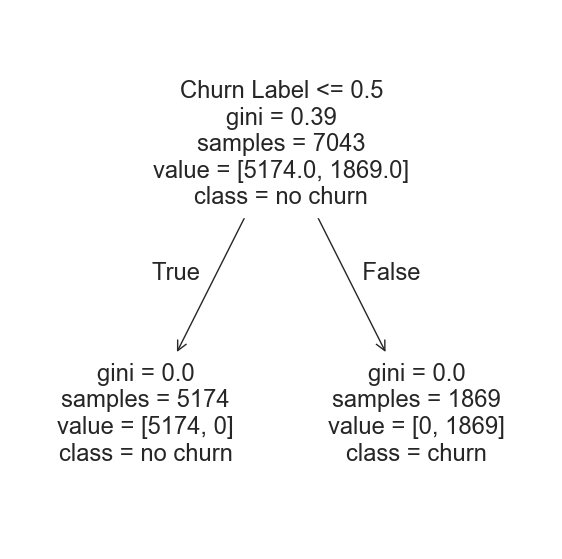

In [69]:
plt.figure(figsize=(7, 7))
plot_tree(model, feature_names=X.columns, class_names=["no churn", "churn"])

In [ ]:
#alta pureza en nuestro arbol de decision. Cada hoja alcanza a tener cero.

In [70]:
predicted_prob = model.predict_proba(X)

In [71]:
predicted_prob

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [72]:
predicted_class = model.predict(X)

In [73]:
predicted_class

array([1, 1, 1, ..., 0, 0, 0])

In [74]:
data_and_predictions = data.copy()
data_and_predictions

,Gender,Age,Married,Dependents,Number of Dependents,Zip Code,Population,Referred a Friend,Number of Referrals,Tenure in Months,Offer_No Offer,Offer_Offer E,Offer_Offer D,Offer_Offer C,Offer_Offer B,Offer_Offer A,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type_DSL,Internet Type_Fiber Optic,Internet Type_Cable,Internet Type_No Internet,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract_Month-to-Month,Contract_One Year,Contract_Two Year,Paperless Billing,Payment Method_Bank Withdrawal,Payment Method_Credit Card,Payment Method_Mailed Check,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Churn Label
0,1,78,0,0,0,90022,68701,0,0,1,1,0,0,0,0,0,0,0.00,0,1,1,0,0,0,8,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,39.65,39.65,0.00,20,0.00,59.65,3,1
1,0,74,1,1,1,90063,55668,1,1,8,0,1,0,0,0,0,1,48.85,1,1,0,1,0,0,17,0,1,0,0,0,0,0,1,1,0,0,1,0,1,0,80.65,633.30,0.00,0,390.80,1024.10,3,1
2,1,71,0,1,3,90065,47534,0,0,18,0,0,1,0,0,0,1,11.33,1,1,0,1,0,0,52,0,0,0,0,1,1,1,1,1,0,0,1,1,0,0,95.45,1752.55,45.61,0,203.94,1910.88,2,1
3,0,78,1,1,1,90303,27778,1,1,25,0,0,0,1,0,0,1,19.76,0,1,0,1,0,0,12,0,1,1,0,1,1,0,1,1,0,0,1,1,0,0,98.50,2514.50,13.43,0,494.00,2995.07,2,1
4,0,80,1,1,1,90602,26265,1,1,37,0,0,0,1,0,0,1,6.33,1,1,0,1,0,0,14,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,76.50,2868.15,0.00,0,234.21,3102.36,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,30,0,0,0,92285,2182,0,0,72,1,0,0,0,0,0,1,22.77,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,21.15,1419.40,19.31,0,1639.44,3039.53,5,0
7039,1,38,1,1,2,92301,18980,1,1,24,0,0,0,1,0,0,1,36.05,1,1,0,0,1,0,24,1,0,1,1,1,1,1,1,0,1,0,1,0,0,1,84.80,1990.50,48.23,0,865.20,2807.47,3,0
7040,0,30,1,1,2,92304,42,1,4,72,1,0,0,0,0,0,1,29.66,1,1,0,1,0,0,59,0,1,1,0,1,1,1,1,0,1,0,1,0,1,0,103.20,7362.90,45.38,0,2135.52,9453.04,4,0
7041,0,32,1,1,2,92305,301,1,1,11,1,0,0,0,0,0,0,0.00,0,1,1,0,0,0,17,1,0,0,0,0,0,0,1,1,0,0,1,1,0,0,29.60,346.45,27.24,0,0.00,319.21,4,0


In [75]:
data_and_predictions["predicted_class"] = predicted_class
data_and_predictions["predicted_prob(no churn)"] = predicted_prob[:,0]
data_and_predictions["predicted_prob(churn)"] = predicted_prob[:,1]

In [76]:
def calculate_accuracy(predictions):
    number_of_hits = (predictions["Churn Label"] == predictions["predicted_class"]).sum()
    number_of_predictions = len(predictions)

    accuracy = round(number_of_hits/number_of_predictions*100, 2)
    accuracy = float(accuracy)

    return accuracy

In [77]:
calculate_accuracy(data_and_predictions)

100.0

In [78]:
data

,Gender,Age,Married,Dependents,Number of Dependents,Zip Code,Population,Referred a Friend,Number of Referrals,Tenure in Months,Offer_No Offer,Offer_Offer E,Offer_Offer D,Offer_Offer C,Offer_Offer B,Offer_Offer A,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type_DSL,Internet Type_Fiber Optic,Internet Type_Cable,Internet Type_No Internet,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract_Month-to-Month,Contract_One Year,Contract_Two Year,Paperless Billing,Payment Method_Bank Withdrawal,Payment Method_Credit Card,Payment Method_Mailed Check,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Churn Label
0,1,78,0,0,0,90022,68701,0,0,1,1,0,0,0,0,0,0,0.00,0,1,1,0,0,0,8,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,39.65,39.65,0.00,20,0.00,59.65,3,1
1,0,74,1,1,1,90063,55668,1,1,8,0,1,0,0,0,0,1,48.85,1,1,0,1,0,0,17,0,1,0,0,0,0,0,1,1,0,0,1,0,1,0,80.65,633.30,0.00,0,390.80,1024.10,3,1
2,1,71,0,1,3,90065,47534,0,0,18,0,0,1,0,0,0,1,11.33,1,1,0,1,0,0,52,0,0,0,0,1,1,1,1,1,0,0,1,1,0,0,95.45,1752.55,45.61,0,203.94,1910.88,2,1
3,0,78,1,1,1,90303,27778,1,1,25,0,0,0,1,0,0,1,19.76,0,1,0,1,0,0,12,0,1,1,0,1,1,0,1,1,0,0,1,1,0,0,98.50,2514.50,13.43,0,494.00,2995.07,2,1
4,0,80,1,1,1,90602,26265,1,1,37,0,0,0,1,0,0,1,6.33,1,1,0,1,0,0,14,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,76.50,2868.15,0.00,0,234.21,3102.36,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,30,0,0,0,92285,2182,0,0,72,1,0,0,0,0,0,1,22.77,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,21.15,1419.40,19.31,0,1639.44,3039.53,5,0
7039,1,38,1,1,2,92301,18980,1,1,24,0,0,0,1,0,0,1,36.05,1,1,0,0,1,0,24,1,0,1,1,1,1,1,1,0,1,0,1,0,0,1,84.80,1990.50,48.23,0,865.20,2807.47,3,0
7040,0,30,1,1,2,92304,42,1,4,72,1,0,0,0,0,0,1,29.66,1,1,0,1,0,0,59,0,1,1,0,1,1,1,1,0,1,0,1,0,1,0,103.20,7362.90,45.38,0,2135.52,9453.04,4,0
7041,0,32,1,1,2,92305,301,1,1,11,1,0,0,0,0,0,0,0.00,0,1,1,0,0,0,17,1,0,0,0,0,0,0,1,1,0,0,1,1,0,0,29.60,346.45,27.24,0,0.00,319.21,4,0


## KNN 

##### SIN GRID Y COLUMNAS FILTRADAS


In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [80]:
KNclassifier = KNeighborsClassifier(n_neighbors=20)

In [81]:
KNclassifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [82]:
y_pred = KNclassifier.predict(X_test)

C:\Users\sharo\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\sharo\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


In [83]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.95      0.85      1009
           1       0.67      0.28      0.40       400

    accuracy                           0.76      1409
   macro avg       0.72      0.61      0.62      1409
weighted avg       0.74      0.76      0.72      1409

[[954  55]
 [287 113]]


In [84]:
from sklearn.metrics import accuracy_score,precision_score,recall_score
KNAcc = accuracy_score(y_pred,y_test)
KNrecall = recall_score(y_test, y_pred)
KNprecision = precision_score(y_test, y_pred)
print('K Neighbours accuracy is: {:.2f}%'.format(KNAcc*100))
print("Recall: {:.2f}%".format(KNrecall*100))
print("Precision: {:.2f}%".format(KNprecision*100))

K Neighbours accuracy is: 75.73%
Recall: 28.25%
Precision: 67.26%


##### SIN GRID Y TODAS COLUMNAS

In [85]:
## TODAS LAS COLUMNAS SELECCIONADAS
X = data.drop("Churn Label", axis=1) 
y = data["Churn Label"]

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [87]:
KNclassifier = KNeighborsClassifier(n_neighbors=20)

In [88]:
KNclassifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [89]:
y_pred = KNclassifier.predict(X_test)

In [90]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.96      0.83      1009
           1       0.58      0.16      0.25       400

    accuracy                           0.73      1409
   macro avg       0.66      0.56      0.54      1409
weighted avg       0.70      0.73      0.67      1409

[[964  45]
 [337  63]]


In [91]:
from sklearn.metrics import accuracy_score,precision_score,recall_score
KNAcc = accuracy_score(y_pred,y_test)
KNrecall = recall_score(y_test, y_pred)
KNprecision = precision_score(y_test, y_pred)
print('K Neighbours accuracy is: {:.2f}%'.format(KNAcc*100))
print("Recall: {:.2f}%".format(KNrecall*100))
print("Precision: {:.2f}%".format(KNprecision*100))

K Neighbours accuracy is: 72.89%
Recall: 15.75%
Precision: 58.33%


##### CON GRID Y COLUMNAS FILTRADAS


In [92]:
X = data[columnasModelo]
y = data["Churn Label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [93]:
KNclassifierGrid = KNeighborsClassifier()

In [94]:
param_grid = {
    'n_neighbors': [5, 10, 15, 20],  # Puedes ajustar este rango según sea necesario
    'weights': ['uniform', 'distance'],  # Probar pesos uniformes y basados en la distancia
    'metric': ['euclidean', 'manhattan']  # Probar diferentes métricas de distancia
}

In [95]:
grid_search = GridSearchCV(estimator=KNclassifierGrid, param_grid=param_grid, cv=5, scoring='accuracy')


In [96]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [5, 10, 15, 20],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [97]:
bestKnnGrid = grid_search.best_estimator_

In [98]:
print("Mejores parámetros encontrados:", grid_search.best_params_)

Mejores parámetros encontrados: {'metric': 'manhattan', 'n_neighbors': 20, 'weights': 'distance'}


In [99]:
y_pred = bestKnnGrid.predict(X_test)

In [100]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


from sklearn.metrics import accuracy_score,precision_score,recall_score
KNAcc = accuracy_score(y_pred,y_test)
KNrecall = recall_score(y_test, y_pred)
KNprecision = precision_score(y_test, y_pred)
print('K Neighbours accuracy is: {:.2f}%'.format(KNAcc*100))
print("Recall: {:.2f}%".format(KNrecall*100))
print("Precision: {:.2f}%".format(KNprecision*100))

              precision    recall  f1-score   support

           0       0.79      0.93      0.85      1009
           1       0.68      0.39      0.49       400

    accuracy                           0.77      1409
   macro avg       0.74      0.66      0.67      1409
weighted avg       0.76      0.77      0.75      1409

[[936  73]
 [246 154]]
K Neighbours accuracy is: 77.36%
Recall: 38.50%
Precision: 67.84%


In [101]:
columnasRelevantes = [
    'Gender',  # El género podría estar relacionado con patrones de comportamiento de uso.
    'Age',  # La edad puede influir en el tipo de servicios contratados y la retención.
    'Married',  # Estado civil, tal vez relacionado con la estabilidad del cliente.
    'Tenure in Months',  # Antigüedad con la empresa, un factor clave para el churn.
    'Phone Service',  # Tener o no servicio telefónico puede ser un indicador de compromiso.
    'Avg Monthly Long Distance Charges',  # Cargos mensuales de larga distancia, podrían mostrar la dependencia del servicio.
    'Multiple Lines',  # Líneas múltiples pueden indicar mayor compromiso con los servicios.
    'Internet Service',  # Servicio de Internet como factor principal de retención.
    'Avg Monthly GB Download',  # Uso de datos, relacionado con la intensidad del uso de los servicios.
    'Online Security',  # Servicios adicionales que pueden influir en la lealtad del cliente.
    'Streaming TV',  # Servicios de entretenimiento también pueden afectar la retención.
    'Unlimited Data',  # Servicios de datos ilimitados pueden ser una ventaja competitiva.
    'Contract_Month-to-Month',  # Clientes con contratos mensuales suelen tener mayor probabilidad de irse.
    'Paperless Billing',  # Preferencia por facturación sin papel puede indicar un cliente más comprometido digitalmente.
    'Payment Method_Bank Withdrawal',  # Método de pago, algunos métodos pueden asociarse a mayor estabilidad.
    'Monthly Charge',  # El monto mensual podría ser un indicador de carga financiera.
    'Satisfaction Score',  # La satisfacción es un predictor directo de churn.
    'Churn Label'  # La variable objetivo.
]

In [102]:
X = data[columnasRelevantes]
y = data["Churn Label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [103]:
KNclassifierGrid2 = KNeighborsClassifier()

In [111]:
from sklearn.model_selection import GridSearchCV

In [112]:
grid_search = GridSearchCV(estimator=KNclassifierGrid2, param_grid=param_grid, cv=5, scoring='accuracy')

In [113]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [5, 10, 15, 20],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [114]:
bestKnnGrid = grid_search.best_estimator_

In [115]:
y_pred = bestKnnGrid.predict(X_test)

In [116]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


from sklearn.metrics import accuracy_score,precision_score,recall_score
KNAcc = accuracy_score(y_pred,y_test)
KNrecall = recall_score(y_test, y_pred)
KNprecision = precision_score(y_test, y_pred)
print('K Neighbours accuracy is: {:.2f}%'.format(KNAcc*100))
print("Recall: {:.2f}%".format(KNrecall*100))
print("Precision: {:.2f}%".format(KNprecision*100))

              precision    recall  f1-score   support

           0       0.85      0.94      0.90      1009
           1       0.81      0.58      0.68       400

    accuracy                           0.84      1409
   macro avg       0.83      0.76      0.79      1409
weighted avg       0.84      0.84      0.83      1409

[[953  56]
 [166 234]]
K Neighbours accuracy is: 84.24%
Recall: 58.50%
Precision: 80.69%


In [117]:
##Mejoro bastante con las columnas filtradas y con el grid

In [ ]:
best_model

In [ ]:
search.best_params_

In [ ]:
search_results = pd.DataFrame(search.cv_results_)

In [ ]:
search_results

# 6. Model performance evaluation

In [ ]:
y_pred = best_model.predict(val_data.drop(columns=["Target"]))
y_pred_prob = best_model.predict_proba(val_data.drop(columns=["Target"]))[:, 1]

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_true=val_data["Target"], y_pred=y_pred)

In [ ]:
print(classification_report(y_true=val_data["Target"], y_pred=y_pred))

# 7. Explainability

In [ ]:
explainer = shap.TreeExplainer(best_model)

In [ ]:
explanation = explainer(train_data.drop(columns=["Target"]))

In [ ]:
plt.figure(figsize=(20,8))
shap.summary_plot(explanation.values[:,:,1], features=train_data.drop(columns=["Target"]), plot_type="bar")

In [ ]:
plt.figure(figsize=(20,8))
shap.summary_plot(explanation.values[:,:,1], features=train_data.drop(columns=["Target"]))

In [ ]:
shap.plots.waterfall(explanation[6,:,1], max_display=20)